#Exploring the training data set with machine-learning basics

In this script I explore how the training data set is structured using unsupervised machine learning, *i.e.* I want to identify discernable patterns or subgroups in the data set without feeding the label vector into the algorithm.

First thing to do is to reshape the data matrix into 2D to make it compatible with the scikit-learn module. Secondly, the label vector is constructed from scratch so that each datapoint can be assigned to the original class it was part of (the original label vector A is too small). The label vector will be used to asses how well the unsupervised algorithms do at recognise the originial classes.

**NB:** I am not considering the development in time of the signal, here we just look at where the x,y,z acceleration values lie in space and if there are identifiable groups.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Loading and reshaping training data set
data = np.load('X.npy')
#target = np.load('A.npy')

X = data.reshape(-1,3)

#Constructing a new label vector
y = np.zeros((10000,1),dtype=int)
n = 2000
x = 1

while n < 10000:
    for i in range(n,n+2000):
        y[i] = x
    n+=2000
    x+=1
    
print X.shape
print y.shape

(10000, 3)
(10000, 1)


##Principal component analysis - dimensionality reduction

The question asked here: can we project the x,y,z acceleration components onto 2 dimensions?

(10000, 2)


<matplotlib.colorbar.Colorbar instance at 0x115d6f3b0>

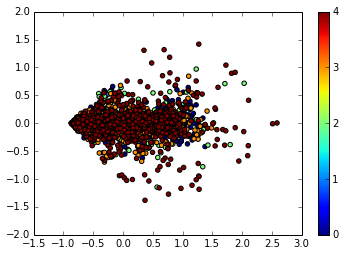

In [14]:
from sklearn.decomposition import PCA

pca = PCA(2)
Xproj = pca.fit_transform(X)

print Xproj.shape

plt.scatter(Xproj[:,0],Xproj[:,1],c=y)
plt.colorbar(ticks=range(0,5))

**Conclusion:** The PCA is not useful in this dataset as the data points cluster together to closely to identify separate groups in 2D. The variability of the dataset retained by the 2D projection is only ~85%.

##Clustering

Can we naively identify clusters of data that match the classes we predefined?

[1 3 2 ..., 3 1 3]


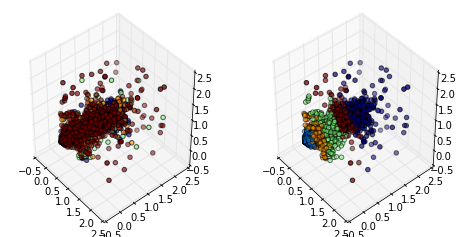

In [25]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

est = KMeans(5)
est.fit(X)
y_kmeans = est.predict(X)

#plot the data in three dimensions
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.view_init(40, -40)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_kmeans)
ax.view_init(40, -40)

**Conclusion:** As evident from the two 3D plots above (left: original classes, right: found clusters) the KMeans algorithm is not able to identify the original classes.

##Overall conclusion

Definitely need to consider time aspect the signal.